In [1]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q datasets seqeval
!pip install accelerate -U

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 5.9 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

# this dataset uses the new Image feature :)
dataset = load_dataset("layoutlmv3.py", trust_remote_code=True)

Generating train split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/download/streaming_download_manager.py:784: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


["{'id': 11, 'file_name': '65b88cad-6.png', 'tokens': ['Group', 'Name:', 'BLT', 'Management', 'Inc', 'Group', 'Number:', '11223344', 'Effective', 'Date:', '|', 'January', '1,', '2022', 'Network:', 'Freedom', 'Network', 'PCP:', 'No', 'Charge', 'After', 'Deductible', 'ER', 'Copay:', 'No', 'Charge', 'After', 'Deductible', 'Single', 'Deductible:', '$2850', 'Family', 'Deductible:', '|', '$5750', 'Coinsurance:', 'None', 'Single', 'Deductible:', '|', '$1000', 'Family', 'Deductible:', '$9820', 'Coinsurance:', '30%'], 'bboxes': [[58, 67, 150, 96], [160, 67, 253, 89], [492, 67, 547, 89], [557, 67, 754, 96], [763, 67, 808, 89], [58, 144, 150, 174], [161, 143, 291, 167], [501, 144, 655, 167], [1144, 74, 1272, 97], [1289, 75, 1365, 97], [1380, 70, 1397, 108], [1405, 75, 1524, 104], [1534, 75, 1557, 102], [1568, 75, 1643, 97], [1144, 226, 1281, 263], [1410, 230, 1544, 253], [1554, 230, 1685, 253], [139, 765, 199, 803], [381, 770, 417, 792], [428, 769, 524, 799], [533, 769, 605, 792], [614, 769, 765,

Generating test split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/download/streaming_download_manager.py:784: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


["{'id': 5, 'file_name': '62dbca0c-11.png', 'tokens': ['Group', 'Name:', 'SP', 'Chemicals', 'Group', 'Number:', '995565', 'Effective', 'Date:', '|', 'March', '5,', '2022', 'Network:', 'Freedom', 'Network', 'PCP:', '$2560', 'ER', 'Copay:', '$2201', 'Single', 'Deductible:', '$2850', 'Family', 'Deductible:', '$', '2200', 'Coinsurance:', '15%', 'Single', 'Deductible:', '|', '$1000', 'Family', 'Deductible:', '|_$2530', '.', '0,', 'Coinsurance:', '30%'], 'bboxes': [[58, 67, 150, 96], [160, 67, 253, 89], [484, 63, 520, 85], [530, 62, 682, 85], [58, 144, 150, 174], [161, 143, 291, 167], [537, 141, 651, 164], [1144, 74, 1272, 97], [1289, 75, 1365, 97], [1386, 68, 1400, 108], [1422, 77, 1515, 100], [1526, 77, 1557, 102], [1570, 75, 1643, 97], [1144, 226, 1281, 263], [1410, 230, 1544, 253], [1554, 230, 1685, 253], [139, 764, 199, 804], [444, 761, 537, 788], [59, 887, 96, 910], [105, 887, 197, 917], [458, 881, 551, 908], [58, 1121, 141, 1151], [151, 1121, 309, 1144], [387, 1119, 474, 1146], [58, 1

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'bboxes', 'ner_tags', 'image_path', 'image'],
        num_rows: 8
    })
    test: Dataset({
        features: ['id', 'tokens', 'bboxes', 'ner_tags', 'image_path', 'image'],
        num_rows: 4
    })
})

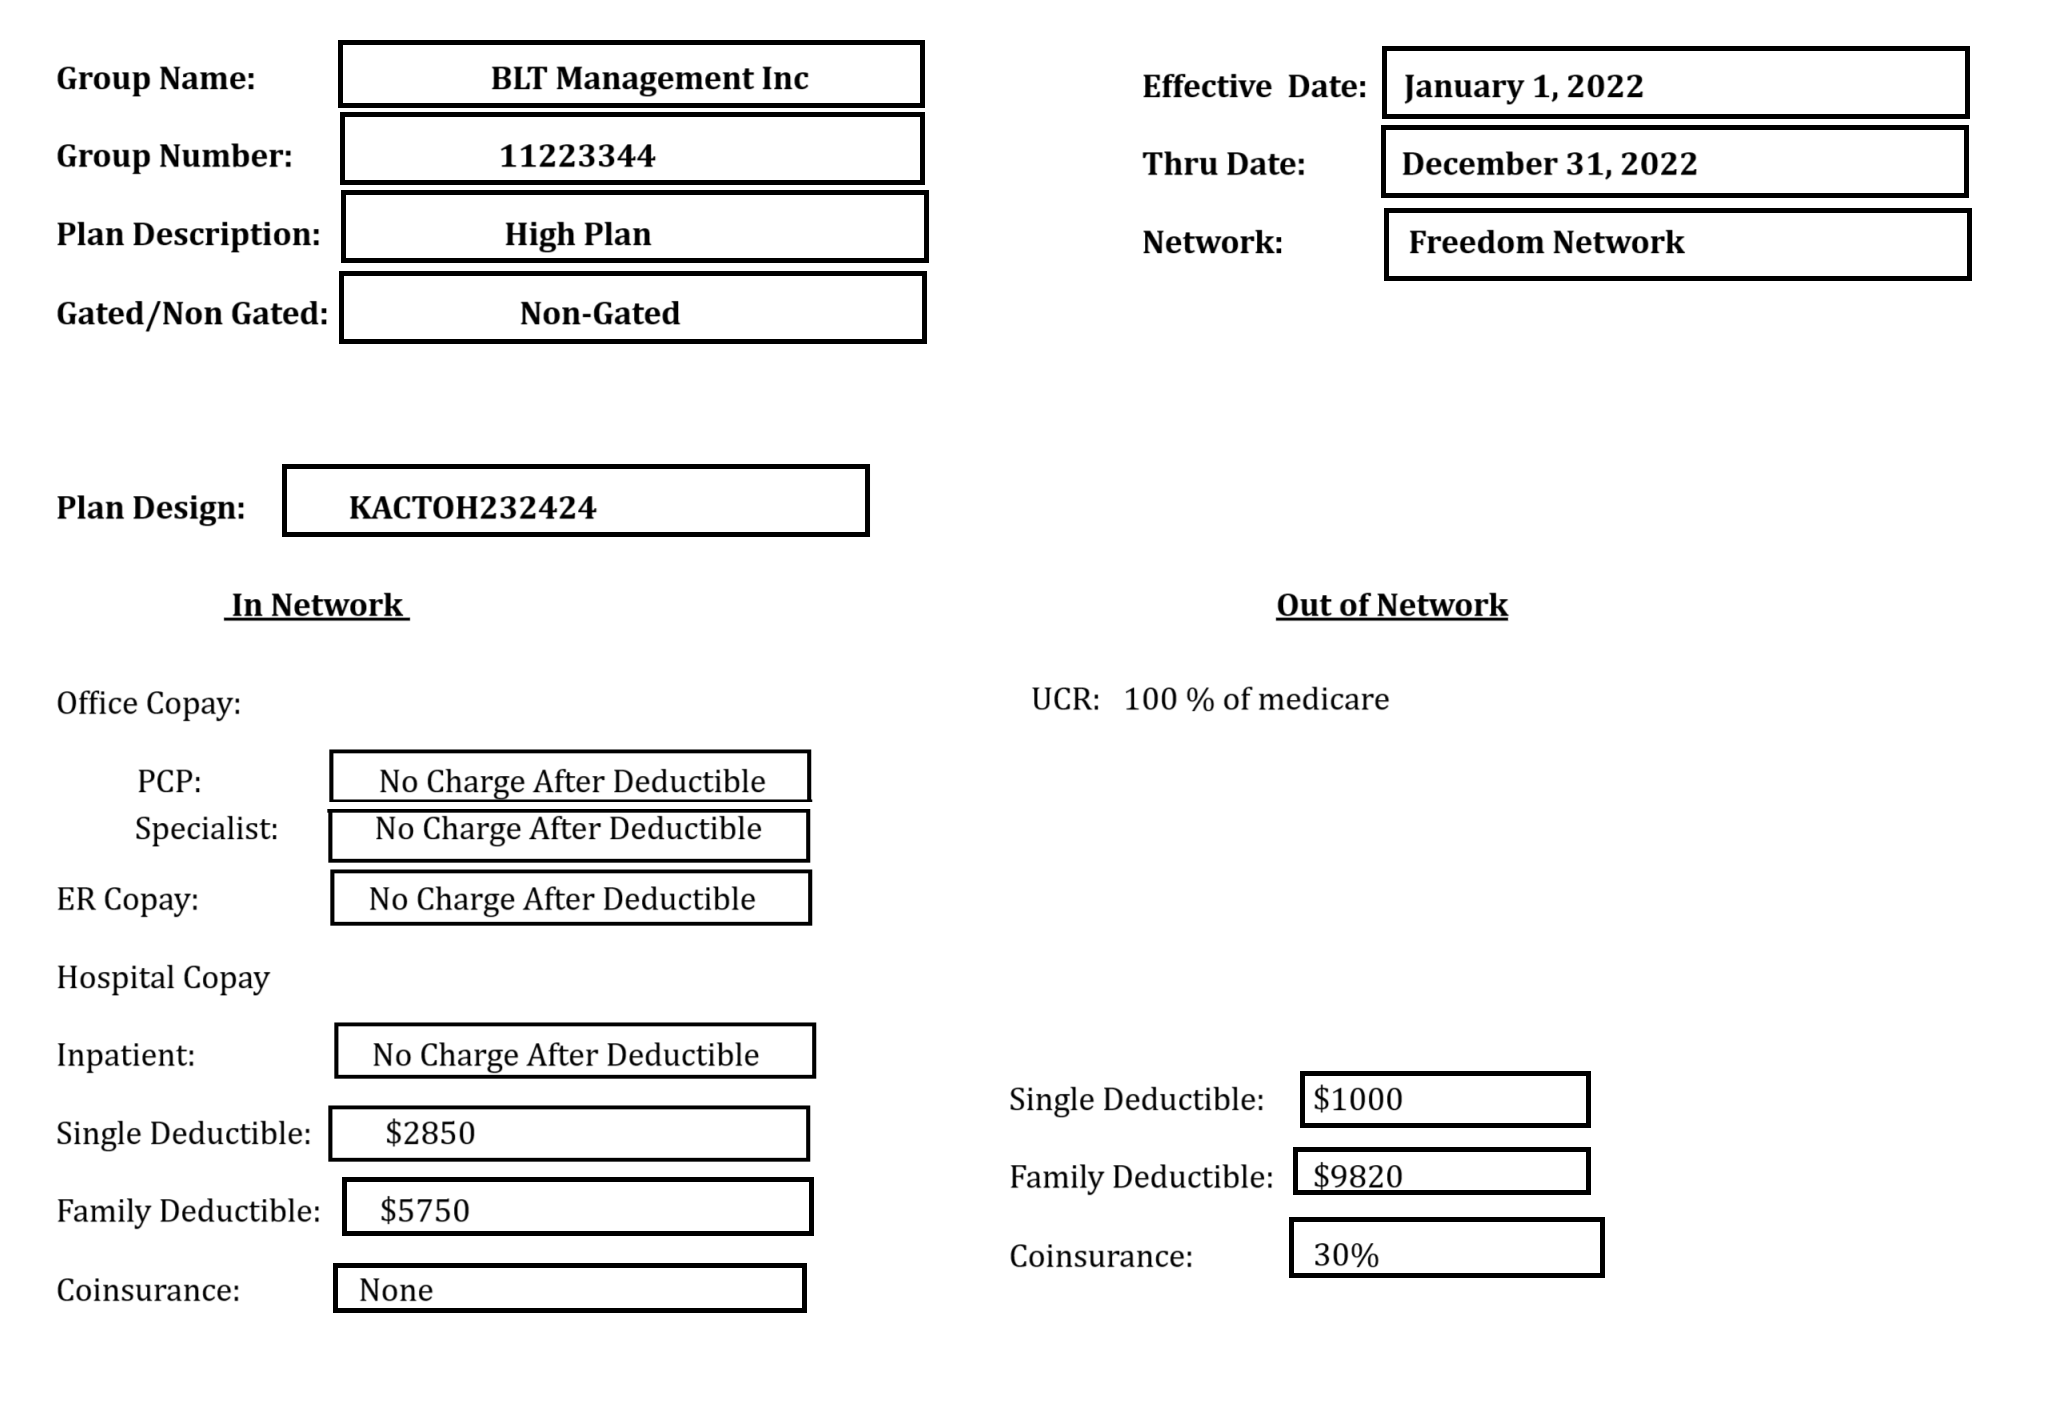

In [4]:
dataset['train'][0]['image']

In [5]:
example=dataset['train'][0]
words, boxes, ner_tags = example["tokens"], example["bboxes"], example["ner_tags"]
print(words)
print(boxes)
print(ner_tags)


['Group', 'Name:', 'BLT', 'Management', 'Inc', 'Group', 'Number:', '11223344', 'Effective', 'Date:', '|', 'January', '1,', '2022', 'Network:', 'Freedom', 'Network', 'PCP:', 'No', 'Charge', 'After', 'Deductible', 'ER', 'Copay:', 'No', 'Charge', 'After', 'Deductible', 'Single', 'Deductible:', '$2850', 'Family', 'Deductible:', '|', '$5750', 'Coinsurance:', 'None', 'Single', 'Deductible:', '|', '$1000', 'Family', 'Deductible:', '$9820', 'Coinsurance:', '30%']
[[28, 47, 72, 67], [77, 47, 122, 62], [237, 47, 264, 62], [268, 47, 364, 67], [368, 47, 390, 62], [28, 101, 72, 122], [77, 100, 140, 117], [241, 101, 316, 117], [552, 52, 614, 68], [622, 52, 659, 68], [666, 49, 674, 76], [678, 52, 735, 73], [740, 52, 751, 71], [757, 52, 793, 68], [552, 159, 618, 185], [680, 162, 745, 178], [750, 162, 813, 178], [67, 539, 96, 566], [183, 543, 201, 558], [206, 542, 253, 563], [257, 542, 292, 558], [296, 542, 369, 558], [28, 625, 46, 642], [50, 625, 95, 647], [179, 625, 196, 642], [201, 625, 248, 647], [

In [6]:
from transformers import AutoProcessor

# we'll use the Auto API here - it will load LayoutLMv3Processor behind the scenes,
# based on the checkpoint we provide from the hub
processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/275 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [7]:
import numpy as np
from datasets.features import ClassLabel

return_entity_level_metrics = False

features = dataset["train"].features
column_names = dataset["train"].column_names
image_column_name = "image"
text_column_name = "tokens"
boxes_column_name = "bboxes"
label_column_name = "ner_tags"

# In the event the labels are not a `Sequence[ClassLabel]`, we will need to go through the dataset to get the
# unique labels.
def get_label_list(labels):
    unique_labels = set()
    for label in labels:
        unique_labels = unique_labels | set(label)
    label_list = list(unique_labels)
    label_list.sort()
    return label_list


def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]


# Tokenize the inputs
def prepare_examples(examples):
    images = examples[image_column_name]
    words = examples[text_column_name]
    boxes = examples[boxes_column_name]
    word_labels = examples[label_column_name]

    encoding = processor(images, words, boxes=boxes, word_labels=word_labels,
                       truncation=True, padding="max_length")

    return encoding


def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    if return_entity_level_metrics:
        # Unpack nested dictionaries
        final_results = {}
        for key, value in results.items():
            if isinstance(value, dict):
                for n, v in value.items():
                    final_results[f"{key}_{n}"] = v
            else:
                final_results[key] = value
        return final_results
    else:
        return {
            "precision": results["overall_precision"],
            "recall": results["overall_recall"],
            "f1": results["overall_f1"],
            "accuracy": results["overall_accuracy"],
        }


if isinstance(features[label_column_name].feature, ClassLabel):
    label_list = features[label_column_name].feature.names
    # No need to convert the labels since they are already ints.
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
else:
    label_list = get_label_list(dataset["train"][label_column_name])
    id2label = {k: v for k,v in enumerate(label_list)}
    label2id = {v: k for k,v in enumerate(label_list)}
num_labels = len(label_list)

In [8]:
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D

# we need to define custom features for `set_format` (used later on) to work properly
features = Features({
    'pixel_values': Array3D(dtype="float32", shape=(3, 224, 224)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': Sequence(feature=Value(dtype='int64')),
})

train_dataset = dataset["train"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)
eval_dataset = dataset["test"].map(
    prepare_examples,
    batched=True,
    remove_columns=column_names,
    features=features,
)

Map:   0%|          | 0/8 [00:00<?, ? examples/s]

Map:   0%|          | 0/4 [00:00<?, ? examples/s]

In [9]:
from datasets import load_metric

metric = load_metric("seqeval")

<ipython-input-9-edef154daec7>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("seqeval")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:753: FutureWarning: The repository for seqeval contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.17.1/metrics/seqeval/seqeval.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [10]:
from transformers import LayoutLMv3ForTokenClassification

model = LayoutLMv3ForTokenClassification.from_pretrained("microsoft/layoutlmv3-base",
                                                         id2label=id2label,
                                                         label2id=label2id)

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test",
                                  max_steps=1000,
                                  per_device_train_batch_size=2,
                                  per_device_eval_batch_size=2,
                                  learning_rate=1e-5,
                                  evaluation_strategy="steps",
                                  eval_steps=100,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1")

In [12]:
from transformers.data.data_collator import default_data_collator

# Initialize our Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=processor,
    data_collator=default_data_collator,
    compute_metrics=compute_metrics,
)

In [13]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:962: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Step,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
100,No log,0.167849,1.000000,1.000000,1.000000,0.964497
200,No log,0.039172,1.000000,1.000000,1.000000,1.000000
300,No log,0.019105,1.000000,1.000000,1.000000,1.000000
400,No log,0.012627,1.000000,1.000000,1.000000,1.000000
500,0.241300,0.009283,1.000000,1.000000,1.000000,1.000000
600,0.241300,0.007757,1.000000,1.000000,1.000000,1.000000
700,0.241300,0.006937,1.000000,1.000000,1.000000,1.000000
800,0.241300,0.006078,1.000000,1.000000,1.000000,1.000000
900,0.241300,0.005683,1.000000,1.000000,1.000000,1.000000
1000,0.009200,0.005567,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Group Name seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Group Number seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Effective Date seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Network seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PCP Copay seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/

TrainOutput(global_step=1000, training_loss=0.12525958108901977, metrics={'train_runtime': 831.8821, 'train_samples_per_second': 2.404, 'train_steps_per_second': 1.202, 'total_flos': 530862907392000.0, 'train_loss': 0.12525958108901977, 'epoch': 250.0})

In [14]:
trainer.evaluate()

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:962: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Group Name seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Group Number seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Effective Date seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Network seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PCP Copay seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/

{'eval_loss': 0.009282954968512058,
 'eval_precision': 1.0,
 'eval_recall': 1.0,
 'eval_f1': 1.0,
 'eval_accuracy': 1.0,
 'eval_runtime': 0.638,
 'eval_samples_per_second': 6.269,
 'eval_steps_per_second': 3.135,
 'epoch': 250.0}

In [15]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained('/content/test/checkpoint-1000')

In [16]:
example = dataset["test"][0]
image = example["image"]
words = example["tokens"]
boxes = example["bboxes"]
word_labels = example["ner_tags"]

encoding = processor(image, words, boxes=boxes, word_labels=word_labels, return_tensors="pt")
for k,v in encoding.items():
  print(k,v.shape)

input_ids torch.Size([1, 86])
attention_mask torch.Size([1, 86])
bbox torch.Size([1, 86, 4])
labels torch.Size([1, 86])
pixel_values torch.Size([1, 3, 224, 224])


In [18]:
import torch
with torch.no_grad():
    outputs = model(**encoding)

logits = outputs.logits
predictions = logits.argmax(-1).squeeze().tolist()
labels = encoding.labels.squeeze().tolist()

token_boxes = encoding.bbox.squeeze().tolist()
width, height = image.size

true_predictions = [model.config.id2label[pred] for pred, label in zip(predictions, labels) if label != - 100]
true_labels = [model.config.id2label[label] for prediction, label in zip(predictions, labels) if label != -100]
true_boxes = [unnormalize_box(box, width, height) for box, label in zip(token_boxes, labels) if label != -100]


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:962: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


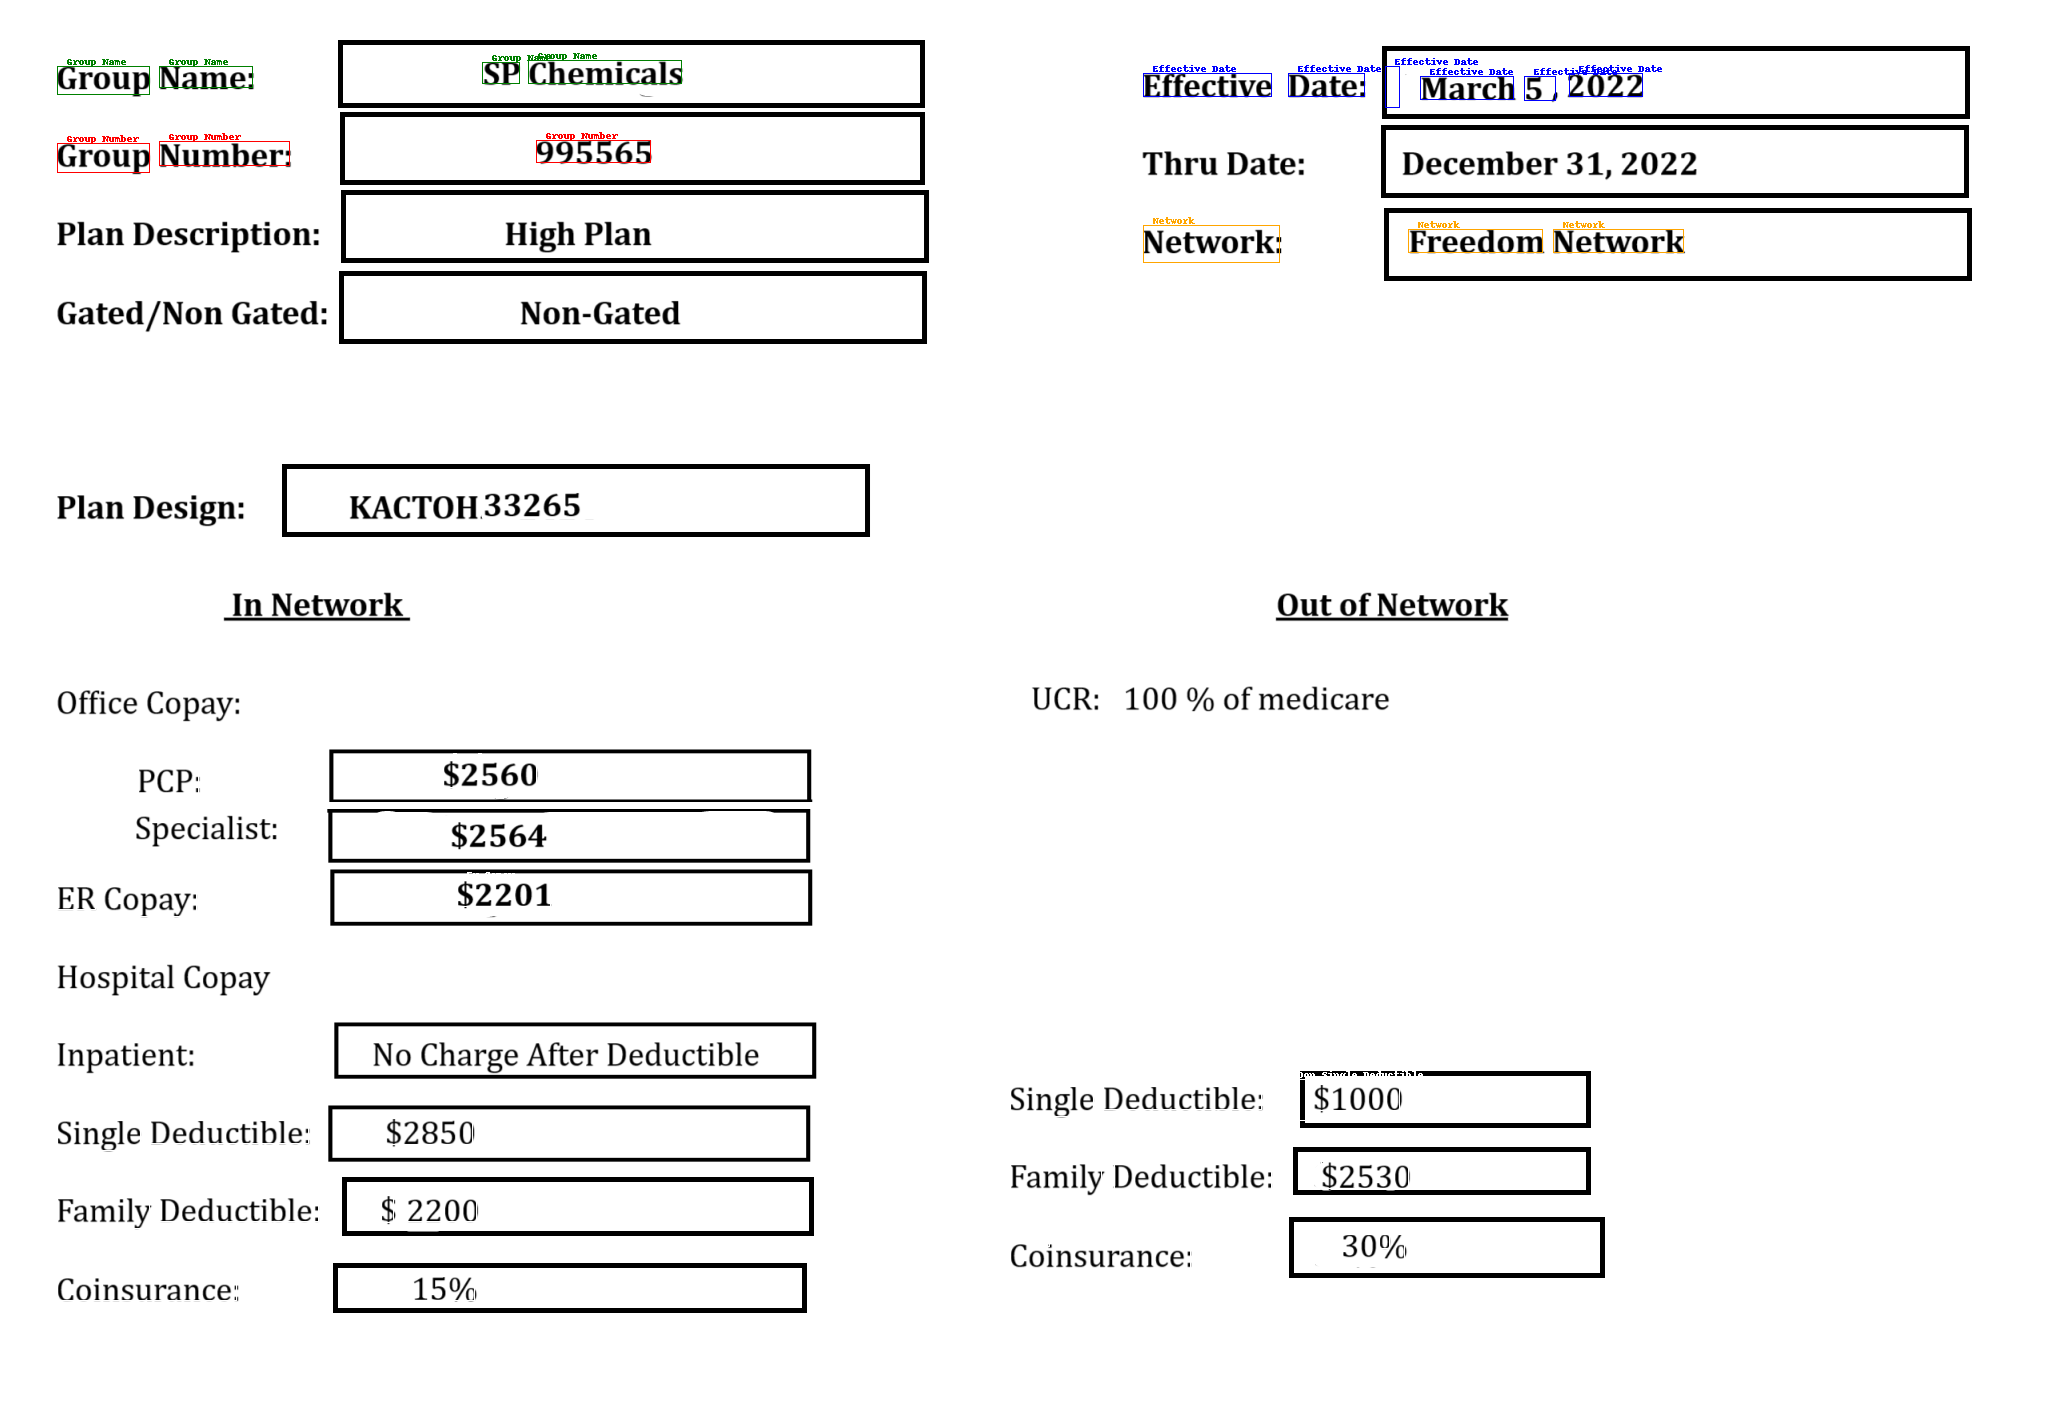

In [22]:
from PIL import ImageDraw, ImageFont

from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
    label = label
    if not label:
      return 'other'
    return label

label2color = {'Group Name': 'green', 'Group Number': 'red', 'Effective Date': 'blue', 'Network': 'orange','PCP Copay': 'yellow', 'ER Copay': 'purple', 'IN Single Deductible': 'cyan', 'IN Family Deductible': 'magenta', 'IN Coinsurance': 'brown', 'OON Single Deductible': 'pink', 'OON Family Deductible': 'gray', 'OON Coinsurance': 'black'}
for prediction, box in zip(true_predictions, true_boxes):
    predicted_label = iob_to_label(prediction)  # Remove .lower()
    predicted_label = predicted_label.title()   # Convert to title case
    draw.rectangle(box, outline=label2color.get(predicted_label, 'white'))  # Use .get() to handle KeyError
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color.get(predicted_label, 'white'), font=font)  # Use .get() to handle KeyError

image


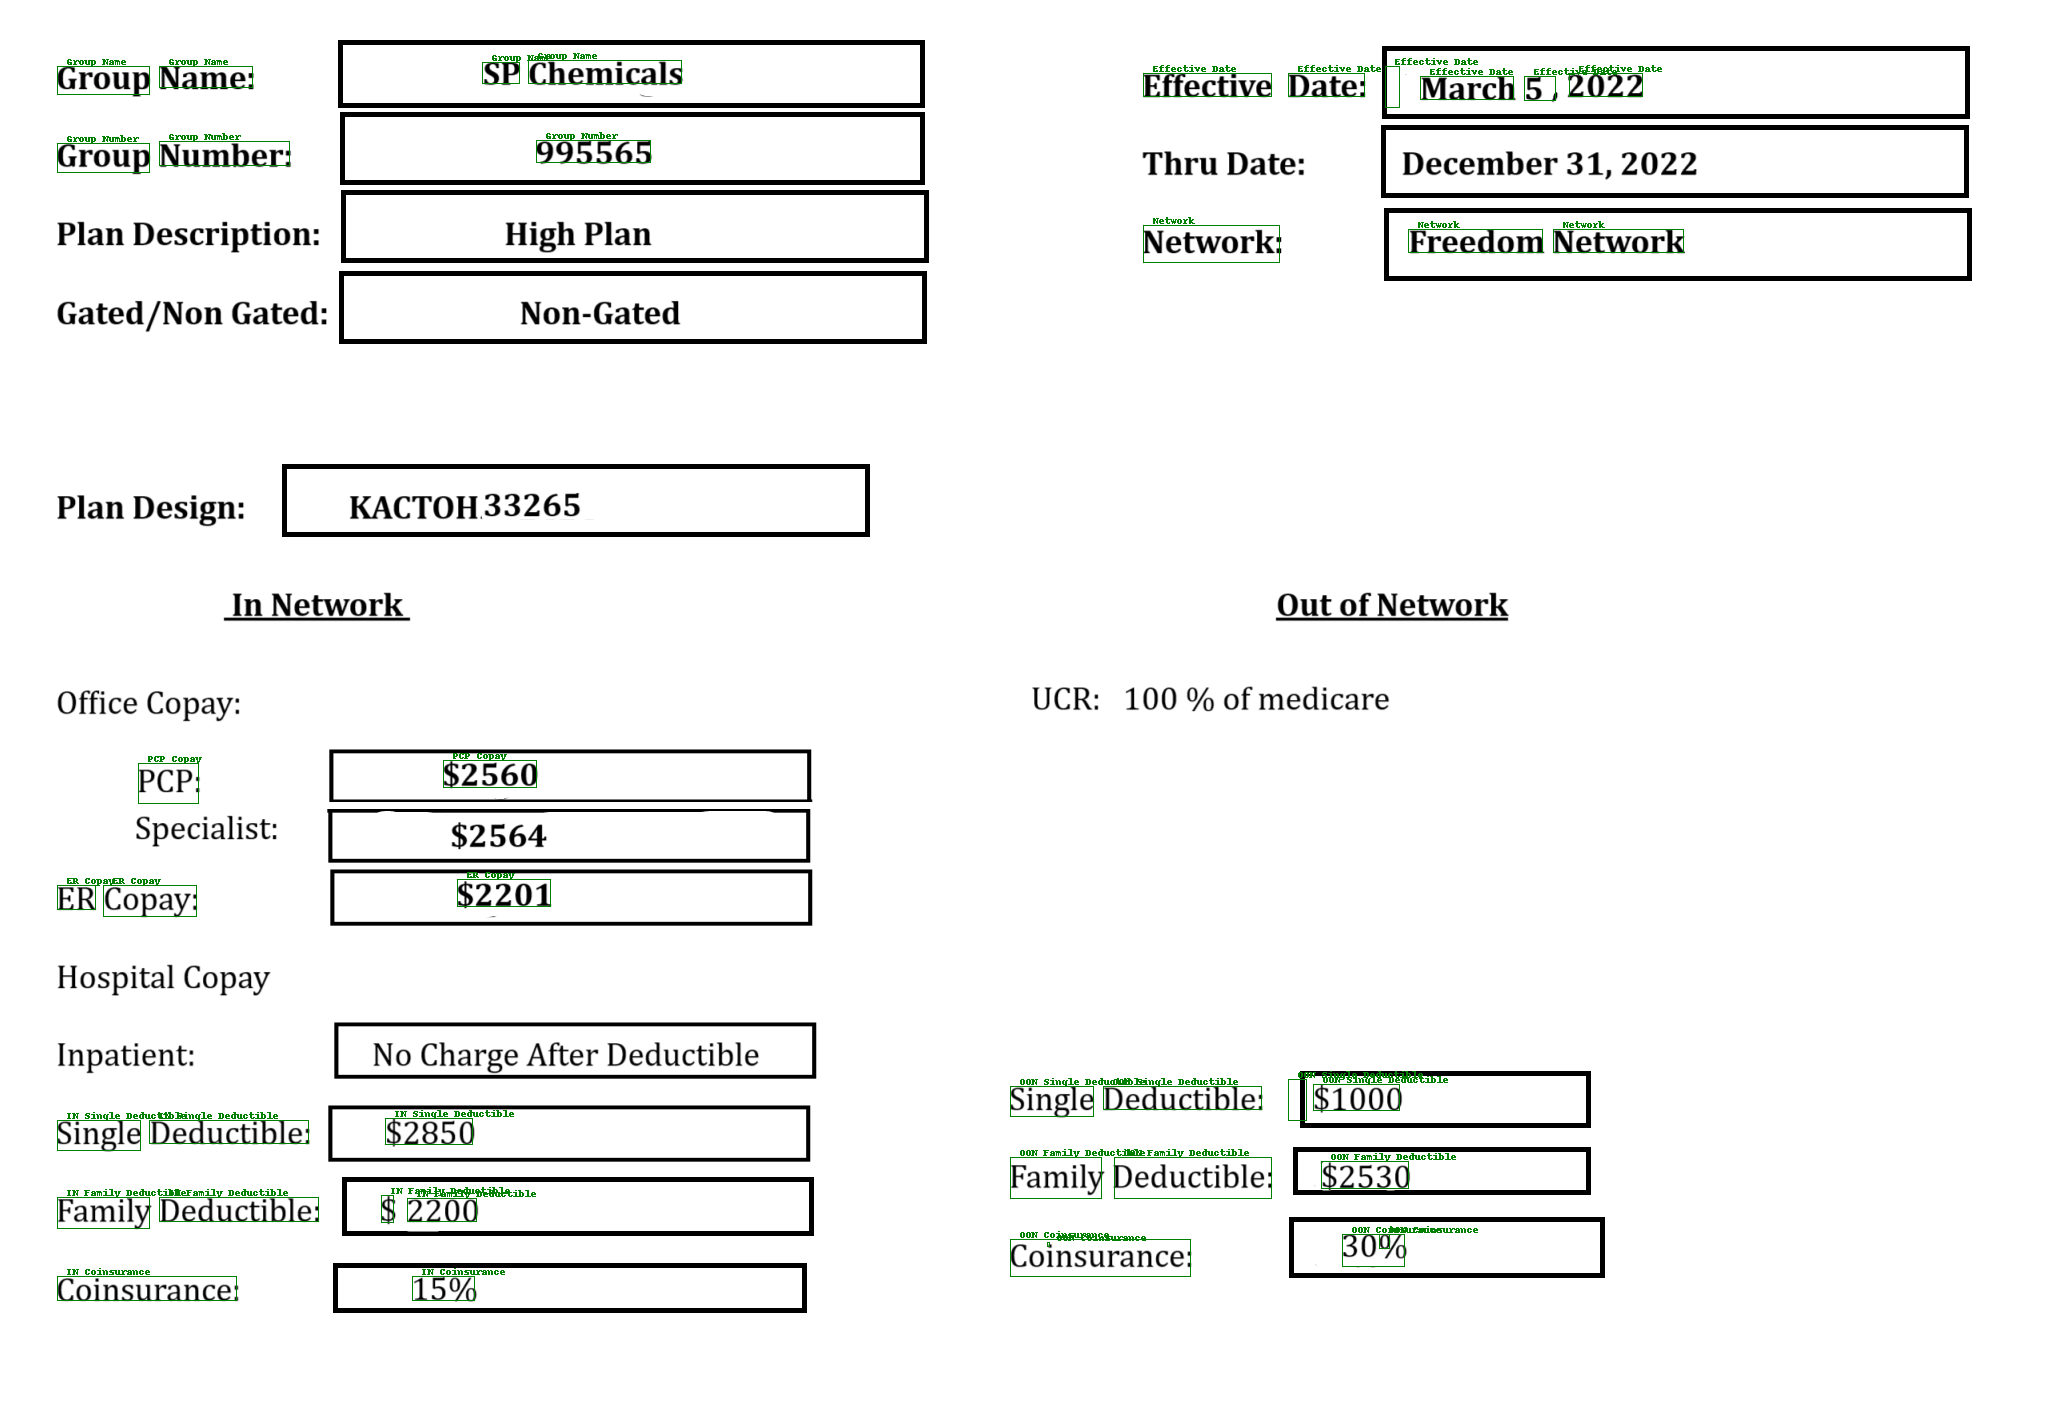

In [23]:
from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
    label = label
    if not label:
        return 'other'
    return label

label_color = 'green'  # Set all labels to green

for prediction, box in zip(true_predictions, true_boxes):
    predicted_label = iob_to_label(prediction)
    draw.rectangle(box, outline=label_color)
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label_color, font=font)

image
